<a href="https://colab.research.google.com/github/vsevolod-BR/clustering/blob/main/cluster_DB_HDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df = df.dropna()
df.isna().any()

In [ ]:
df.head()

In [10]:
df['Date'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y', errors = 'coerce')
df = df.drop('Dt_Customer', axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,3,11,1,2012-09-04
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,3,11,0,2014-03-08
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,3,11,0,2013-08-21
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,3,11,0,2014-02-10
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,3,11,0,2014-01-19


In [12]:
print(max(df['Date']))

2014-06-29 00:00:00


In [14]:
df['Age'] = 2014 - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,1,2012-09-04,57
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,0,2014-03-08,60
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,0,2013-08-21,49
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,0,2014-02-10,30
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,0,2014-01-19,33


In [17]:
df['Having_Child'] = df['Kidhome'] + df['Teenhome']
drop_col = ['Kidhome', 'Teenhome']
df = df.drop(drop_col, axis=1)
df.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date,Age,Having_Child
0,5524,Graduation,Single,58138.0,58,635,88,546,172,88,...,0,0,0,0,3,11,1,2012-09-04,57,0
1,2174,Graduation,Single,46344.0,38,11,1,6,2,1,...,0,0,0,0,3,11,0,2014-03-08,60,2
2,4141,Graduation,Together,71613.0,26,426,49,127,111,21,...,0,0,0,0,3,11,0,2013-08-21,49,0
3,6182,Graduation,Together,26646.0,26,11,4,20,10,3,...,0,0,0,0,3,11,0,2014-02-10,30,1
4,5324,PhD,Married,58293.0,94,173,43,118,46,27,...,0,0,0,0,3,11,0,2014-01-19,33,1


In [18]:
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [20]:
df['Having_Partner'] = df['Marital_Status'].apply(lambda x: 1 if x in ['Together', 'Married'] else 0)
df = df.drop('Marital_Status', axis=1)
df.head()

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date,Age,Having_Child,Having_Partner
0,5524,Graduation,58138.0,58,635,88,546,172,88,88,...,0,0,0,3,11,1,2012-09-04,57,0,0
1,2174,Graduation,46344.0,38,11,1,6,2,1,6,...,0,0,0,3,11,0,2014-03-08,60,2,0
2,4141,Graduation,71613.0,26,426,49,127,111,21,42,...,0,0,0,3,11,0,2013-08-21,49,0,1
3,6182,Graduation,26646.0,26,11,4,20,10,3,5,...,0,0,0,3,11,0,2014-02-10,30,1,1
4,5324,PhD,58293.0,94,173,43,118,46,27,15,...,0,0,0,3,11,0,2014-01-19,33,1,1


In [21]:
df['Family_Size'] = 1 + df['Having_Partner'] + df['Having_Child']
df.head()

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date,Age,Having_Child,Having_Partner,Family_Size
0,5524,Graduation,58138.0,58,635,88,546,172,88,88,...,0,0,3,11,1,2012-09-04,57,0,0,1
1,2174,Graduation,46344.0,38,11,1,6,2,1,6,...,0,0,3,11,0,2014-03-08,60,2,0,3
2,4141,Graduation,71613.0,26,426,49,127,111,21,42,...,0,0,3,11,0,2013-08-21,49,0,1,2
3,6182,Graduation,26646.0,26,11,4,20,10,3,5,...,0,0,3,11,0,2014-02-10,30,1,1,3
4,5324,PhD,58293.0,94,173,43,118,46,27,15,...,0,0,3,11,0,2014-01-19,33,1,1,3


In [22]:
print(df['Education'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [24]:
df['Education_lvl'] = df['Education'].apply(lambda x: 0 if x == 'Basic' else 1 if x == 'Graduation' else 2)
df = df.drop('Education', axis=1)
df.head()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Complain,Z_CostContact,Z_Revenue,Response,Date,Age,Having_Child,Having_Partner,Family_Size,Education_lvl
0,5524,58138.0,58,635,88,546,172,88,88,3,...,0,3,11,1,2012-09-04,57,0,0,1,1
1,2174,46344.0,38,11,1,6,2,1,6,2,...,0,3,11,0,2014-03-08,60,2,0,3,1
2,4141,71613.0,26,426,49,127,111,21,42,1,...,0,3,11,0,2013-08-21,49,0,1,2,1
3,6182,26646.0,26,11,4,20,10,3,5,2,...,0,3,11,0,2014-02-10,30,1,1,3,1
4,5324,58293.0,94,173,43,118,46,27,15,5,...,0,3,11,0,2014-01-19,33,1,1,3,2


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>]], dtype=object)

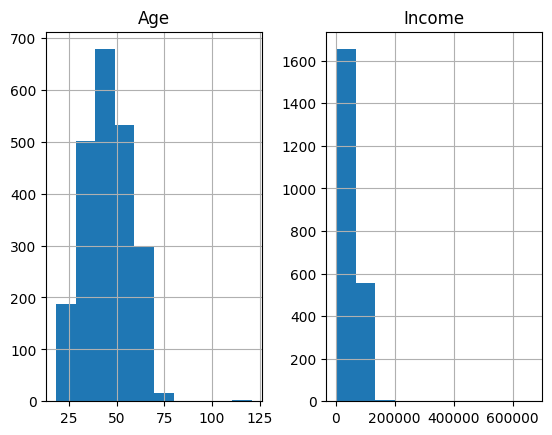

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

df[['Age', 'Income']].hist()

In [29]:
df = df[(df['Age'] < 90)]
df = df[(df['Income'] < 400000)]
df.head()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Complain,Z_CostContact,Z_Revenue,Response,Date,Age,Having_Child,Having_Partner,Family_Size,Education_lvl
0,5524,58138.0,58,635,88,546,172,88,88,3,...,0,3,11,1,2012-09-04,57,0,0,1,1
1,2174,46344.0,38,11,1,6,2,1,6,2,...,0,3,11,0,2014-03-08,60,2,0,3,1
2,4141,71613.0,26,426,49,127,111,21,42,1,...,0,3,11,0,2013-08-21,49,0,1,2,1
3,6182,26646.0,26,11,4,20,10,3,5,2,...,0,3,11,0,2014-02-10,30,1,1,3,1
4,5324,58293.0,94,173,43,118,46,27,15,5,...,0,3,11,0,2014-01-19,33,1,1,3,2


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Income               2212 non-null   float64       
 2   Recency              2212 non-null   int64         
 3   MntWines             2212 non-null   int64         
 4   MntFruits            2212 non-null   int64         
 5   MntMeatProducts      2212 non-null   int64         
 6   MntFishProducts      2212 non-null   int64         
 7   MntSweetProducts     2212 non-null   int64         
 8   MntGoldProds         2212 non-null   int64         
 9   NumDealsPurchases    2212 non-null   int64         
 10  NumWebPurchases      2212 non-null   int64         
 11  NumCatalogPurchases  2212 non-null   int64         
 12  NumStorePurchases    2212 non-null   int64         
 13  NumWebVisitsMonth    2212 non-null   i

In [47]:
ds = df.copy()
drop_col = ['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'Date']
ds = df.drop(drop_col, axis=1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2212 non-null   float64
 1   Recency              2212 non-null   int64  
 2   MntWines             2212 non-null   int64  
 3   MntFruits            2212 non-null   int64  
 4   MntMeatProducts      2212 non-null   int64  
 5   MntFishProducts      2212 non-null   int64  
 6   MntSweetProducts     2212 non-null   int64  
 7   MntGoldProds         2212 non-null   int64  
 8   NumDealsPurchases    2212 non-null   int64  
 9   NumWebPurchases      2212 non-null   int64  
 10  NumCatalogPurchases  2212 non-null   int64  
 11  NumStorePurchases    2212 non-null   int64  
 12  NumWebVisitsMonth    2212 non-null   int64  
 13  Z_CostContact        2212 non-null   int64  
 14  Z_Revenue            2212 non-null   int64  
 15  Age                  2212 non-null   int64 

In [48]:
print(ds.dtypes)

Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Z_CostContact            int64
Z_Revenue                int64
Age                      int64
Having_Child             int64
Having_Partner           int64
Family_Size              int64
Education_lvl            int64
dtype: object


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)
scaled_ds.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Having_Child,Having_Partner,Family_Size,Education_lvl
0,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,0.0,0.0,1.018352,-1.264598,-1.349603,-1.758359,-0.821761
1,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,0.0,0.0,1.274785,1.404572,-1.349603,0.449070,-0.821761
2,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.0,0.0,0.334530,-1.264598,0.740959,-0.654644,-0.821761
3,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,0.0,0.0,-1.289547,0.069987,0.740959,0.449070,-0.821761
4,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,0.0,0.0,-1.033114,0.069987,0.740959,0.449070,1.016192


In [51]:
print(scaled_ds['Z_CostContact'].unique())
print(scaled_ds['Z_Revenue'].unique())

[0.]
[0.]


In [53]:
drop_col = ['Z_CostContact', 'Z_Revenue']
scaled_ds = scaled_ds.drop(drop_col, axis=1)
scaled_ds.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Having_Child,Having_Partner,Family_Size,Education_lvl
0,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,-1.264598,-1.349603,-1.758359,-0.821761
1,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,1.404572,-1.349603,0.449070,-0.821761
2,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,-1.264598,0.740959,-0.654644,-0.821761
3,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,0.069987,0.740959,0.449070,-0.821761
4,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,0.069987,0.740959,0.449070,1.016192


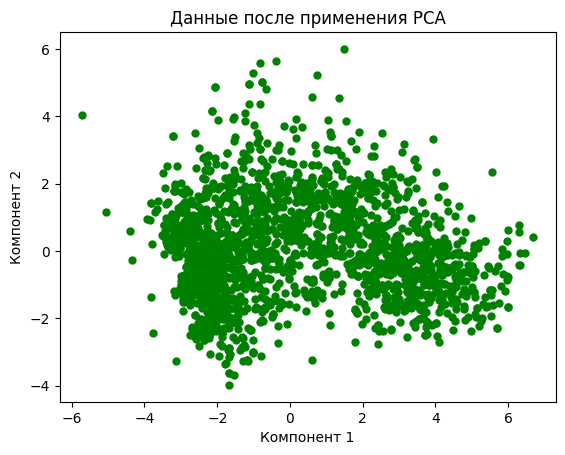

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_ds)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c='green', marker='o', s=25)
plt.title('Данные после применения PCA')
plt.xlabel('Компонент 1')
plt.ylabel('Компонент 2')
plt.show()

In [71]:
from sklearn.cluster import DBSCAN, HDBSCAN

dbs = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbs.fit_predict(X_pca)

In [72]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score

clusters = len(np.unique(y_pred))
score = silhouette_score(X_pca, y_pred)
noise_ratio = sum(y_pred == -1) / len(y_pred)
print(f'Силуэтный коэффициент (DBSCAN): {score} \nУровень шума: {noise_ratio}')

Силуэтный коэффициент (DBSCAN): 0.2696016353709309 
Уровень шума: 0.012206148282097649


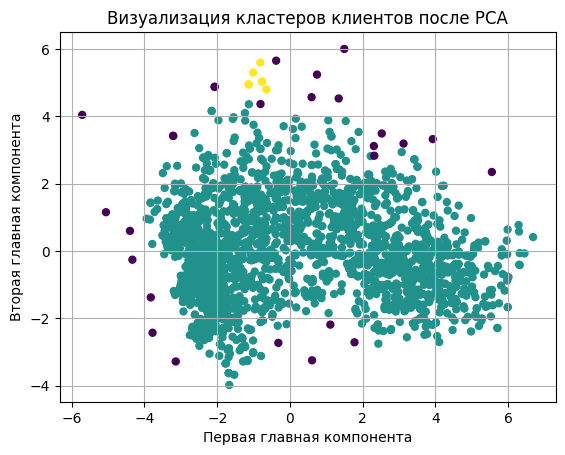

In [73]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap='viridis', s=25)

plt.title('Визуализация кластеров клиентов после PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True)
plt.show()

In [79]:
dbs = DBSCAN(eps=1.6, min_samples=200)
y_pred = dbs.fit_predict(X_pca)

clusters = len(np.unique(y_pred))
score = silhouette_score(X_pca, y_pred)
noise_ratio = sum(y_pred == -1) / len(y_pred)
print(f'Силуэтный коэффициент (DBSCAN): {score} \nУровень шума: {noise_ratio}')

Силуэтный коэффициент (DBSCAN): 0.35871562603684476 
Уровень шума: 0.0108499095840868


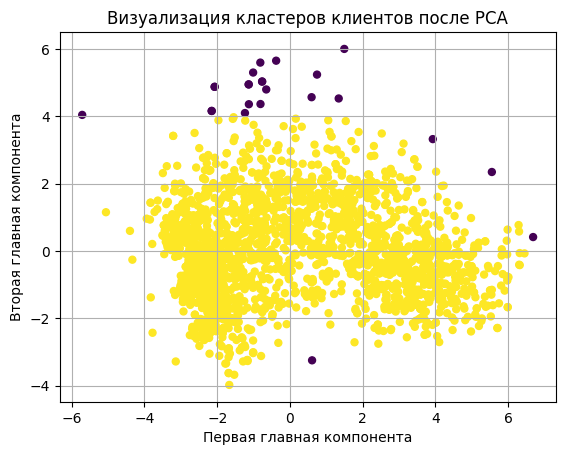

In [80]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap='viridis', s=25)

plt.title('Визуализация кластеров клиентов после PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True)
plt.show()

<ipython-input-81-0263e2039846>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=y_pred, palette='viridis', legend=False)


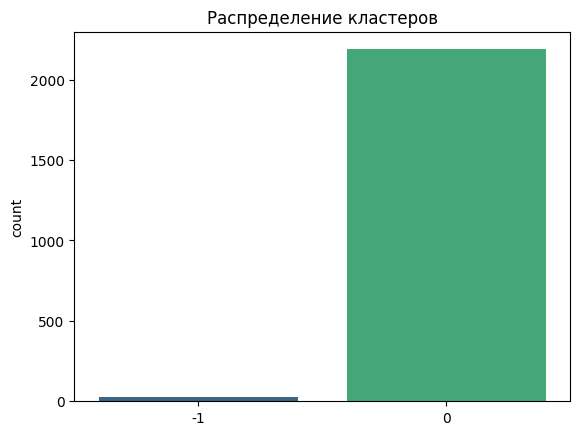

In [81]:
pl = sns.countplot(x=y_pred, palette='viridis', legend=False)
pl.set_title("Распределение кластеров")
plt.show()